# Imports

In [197]:
# Import des librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
plt.style.use('seaborn-whitegrid')
import seaborn as sns

import numpy

import statsmodels.api as sm
import scipy.stats as scs

import sklearn
#classe pour l'ACP
from sklearn.decomposition import PCA
from sklearn import decomposition
from sklearn import preprocessing
from sklearn.preprocessing import scale


#RegLog Kmeans
from sklearn.cluster import KMeans
from sklearn import decomposition
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics

from sklearn.preprocessing import RobustScaler

#CAH
from scipy.cluster.hierarchy import dendrogram

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tools import add_constant
from statsmodels.api import Logit

import warnings
warnings.filterwarnings('ignore')

# Inference analyse

In [198]:
dataset = pd.read_csv("DATA/df_encod.csv", sep=',')
data = dataset.drop('Unnamed: 0', axis =1)
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,location_<1H OCEAN,location_INLAND,location_ISLAND,location_NEAR BAY,location_NEAR OCEAN
0,-119.8400,36.7700,6.0000,1853.0000,473.0000,1397.0000,417.0000,1.4817,72000.0000,0,1,0,0,0
1,-117.8000,33.6800,8.0000,2032.0000,349.0000,862.0000,340.0000,6.9133,274100.0000,1,0,0,0,0
2,-120.1900,36.6000,25.0000,875.0000,214.0000,931.0000,214.0000,1.5536,58300.0000,0,1,0,0,0
3,-118.3200,34.1000,31.0000,622.0000,229.0000,597.0000,227.0000,1.5284,200000.0000,1,0,0,0,0
4,-121.2300,37.7900,21.0000,1922.0000,373.0000,1130.0000,372.0000,4.0815,117900.0000,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16507,-121.9000,39.5900,20.0000,1465.0000,278.0000,745.0000,250.0000,3.0625,93800.0000,0,1,0,0,0
16508,-122.2500,38.1100,49.0000,2365.0000,504.0000,1131.0000,458.0000,2.6133,103100.0000,0,0,0,1,0
16509,-121.2200,38.9200,19.0000,2531.0000,461.0000,1206.0000,429.0000,4.4958,192600.0000,0,1,0,0,0
16510,-118.1400,34.1600,39.0000,2776.0000,840.0000,2546.0000,773.0000,2.5750,153500.0000,1,0,0,0,0


In [199]:
scaler = RobustScaler()
scaled_df = scaler.fit_transform(data)
scaled_df = pd.DataFrame(scaled_df, columns=['longitude','latitude','housing_median_age','total_rooms','total_bedrooms', 
                         'population','households','median_income','median_house_value','location_<1H OCEAN','location_INLAND',
                         'location_ISLAND','location_NEAR BAY','location_NEAR OCEAN'])
scaled_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,location_<1H OCEAN,location_INLAND,location_ISLAND,location_NEAR BAY,location_NEAR OCEAN
0,-0.3571,0.6667,-1.2105,-0.1540,0.1009,0.2411,0.0215,-0.9442,-0.7395,0.0000,1.0000,0.0000,0.0000,0.0000
1,0.1825,-0.1508,-1.1053,-0.0492,-0.2565,-0.3221,-0.2147,1.5580,0.6533,1.0000,0.0000,0.0000,0.0000,0.0000
2,-0.4497,0.6217,-0.2105,-0.7266,-0.6455,-0.2495,-0.6012,-0.9111,-0.8339,0.0000,1.0000,0.0000,0.0000,0.0000
3,0.0450,-0.0397,0.1053,-0.8747,-0.6023,-0.6011,-0.5613,-0.9227,0.1427,1.0000,0.0000,0.0000,0.0000,0.0000
4,-0.7249,0.9365,-0.4211,-0.1136,-0.1873,-0.0400,-0.1166,0.2535,-0.4232,0.0000,1.0000,0.0000,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16507,-0.9021,1.4127,-0.4737,-0.3811,-0.4611,-0.4453,-0.4908,-0.2160,-0.5892,0.0000,1.0000,0.0000,0.0000,0.0000
16508,-0.9947,1.0212,1.0526,0.1458,0.1902,-0.0389,0.1472,-0.4229,-0.5252,0.0000,0.0000,0.0000,1.0000,0.0000
16509,-0.7222,1.2354,-0.5263,0.2430,0.0663,0.0400,0.0583,0.4443,0.0917,0.0000,1.0000,0.0000,0.0000,0.0000
16510,0.0926,-0.0238,0.5263,0.3864,1.1585,1.4505,1.1135,-0.4405,-0.1778,1.0000,0.0000,0.0000,0.0000,0.0000


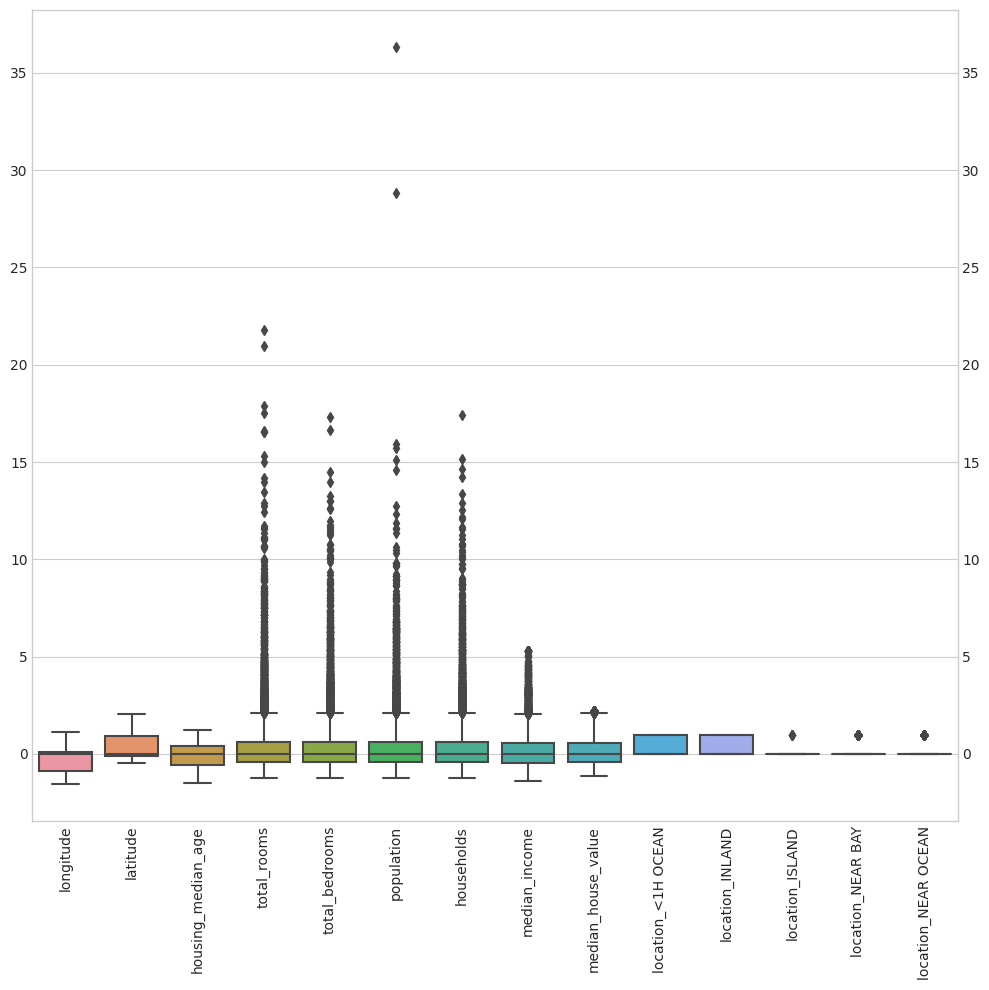

In [200]:
f = plt.figure(figsize=[10,10])
ax = f.add_subplot(111)
sns.boxplot(data=scaled_df, ax=ax)
plt.tick_params(axis='y',which='both',labelleft='on',labelright='on')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_xticklabels(), rotation=90)
f.tight_layout()

##  test de Kolmogorov-Smirnov

In [201]:
liste_var = data
for var in liste_var :
    print(var,":",scs.ks_2samp(data[var],list(np.random.normal(np.mean(data[var]), np.std(data[var]), 1000))))

longitude : KstestResult(statistic=0.19351550387596894, pvalue=2.0804200815173437e-31)
latitude : KstestResult(statistic=0.2607475775193798, pvalue=4.7371784802402567e-57)
housing_median_age : KstestResult(statistic=0.07526211240310074, pvalue=4.313803342164194e-05)
total_rooms : KstestResult(statistic=0.1729137596899225, pvalue=3.9921960075437225e-25)
total_bedrooms : KstestResult(statistic=0.14781007751937986, pvalue=1.901979910442136e-18)
population : KstestResult(statistic=0.15053100775193795, pvalue=4.0454460924656734e-19)
households : KstestResult(statistic=0.18262742248062014, pvalue=5.36327343293773e-28)
median_income : KstestResult(statistic=0.09344040697674416, pvalue=1.2887998434075907e-07)
median_house_value : KstestResult(statistic=0.09760949612403103, pvalue=2.844832635576044e-08)
location_<1H OCEAN : KstestResult(statistic=0.35117054263565894, pvalue=1.7533595999289192e-104)
location_INLAND : KstestResult(statistic=0.43795784883720934, pvalue=4.0953394468294697e-165)
loc

Grâce au test de Kolmogorov-Smirnov réalisé ci-dessus, les Pvalues ne permettent pas de rejetter l'hypothèse gaussienne sur l'ensemble des variables (au niveau de test 5%)


##  Pearson corr

In [202]:
data.corr(method='pearson')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,location_<1H OCEAN,location_INLAND,location_ISLAND,location_NEAR BAY,location_NEAR OCEAN
longitude,1.0000,-0.9248,-0.1099,0.0448,0.0693,0.0998,0.0556,-0.0195,-0.0468,0.3195,-0.0553,0.0096,-0.4738,0.0456
latitude,-0.9248,1.0000,0.0107,-0.0350,-0.0649,-0.1064,-0.0689,-0.0766,-0.1440,-0.4455,0.3511,-0.0166,0.3580,-0.1608
housing_median_age,-0.1099,0.0107,1.0000,-0.3621,-0.3233,-0.2955,-0.3075,-0.1138,0.1086,0.0477,-0.2406,0.0212,0.2565,0.0227
total_rooms,0.0448,-0.0350,-0.3621,1.0000,0.9290,0.8558,0.9202,0.1988,0.1332,-0.0012,0.0277,-0.0060,-0.0284,-0.0099
total_bedrooms,0.0693,-0.0649,-0.3233,0.9290,1.0000,0.8743,0.9743,-0.0056,0.0472,0.0196,-0.0025,-0.0025,-0.0247,-0.0023
population,0.0998,-0.1064,-0.2955,0.8558,0.8743,1.0000,0.9076,0.0044,-0.0274,0.0751,-0.0166,-0.0095,-0.0658,-0.0263
households,0.0556,-0.0689,-0.3075,0.9202,0.9743,0.9076,1.0000,0.0148,0.0632,0.0431,-0.0348,-0.0080,-0.0155,-0.0007
median_income,-0.0195,-0.0766,-0.1138,0.1988,-0.0056,0.0044,0.0148,1.0000,0.6897,0.1687,-0.2409,-0.0089,0.0549,0.0334
median_house_value,-0.0468,-0.1440,0.1086,0.1332,0.0472,-0.0274,0.0632,0.6897,1.0000,0.2590,-0.4880,0.0266,0.1596,0.1429
location_<1H OCEAN,0.3195,-0.4455,0.0477,-0.0012,0.0196,0.0751,0.0431,0.1687,0.2590,1.0000,-0.6074,-0.0139,-0.3139,-0.3440


In [233]:
# most correlated feature
corr = data.corr()
top_corr_features = corr.index[abs(corr['median_house_value'])>0.5]
top_corr_features

Index(['median_income', 'median_house_value'], dtype='object')

In [234]:
# most correlated features 
corr["median_house_value"].sort_values(ascending=False)

median_house_value     1.0000
median_income          0.6897
location_<1H OCEAN     0.2590
location_NEAR BAY      0.1596
location_NEAR OCEAN    0.1429
total_rooms            0.1332
housing_median_age     0.1086
households             0.0632
total_bedrooms         0.0472
location_ISLAND        0.0266
population            -0.0274
longitude             -0.0468
latitude              -0.1440
location_INLAND       -0.4880
Name: median_house_value, dtype: float64

In [236]:
# most correlated features 
corr["total_rooms"].sort_values(ascending=False)

total_rooms            1.0000
total_bedrooms         0.9290
households             0.9202
population             0.8558
median_income          0.1988
median_house_value     0.1332
longitude              0.0448
location_INLAND        0.0277
location_<1H OCEAN    -0.0012
location_ISLAND       -0.0060
location_NEAR OCEAN   -0.0099
location_NEAR BAY     -0.0284
latitude              -0.0350
housing_median_age    -0.3621
Name: total_rooms, dtype: float64

##  OLS

In [203]:
# define X, y
y = scaled_df['median_house_value']
X = scaled_df.drop('median_house_value', axis =1)

In [204]:
ols = sm.OLS(y, sm.add_constant(X)).fit()

In [205]:
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     median_house_value   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     2519.
Date:                Thu, 02 Feb 2023   Prob (F-statistic):               0.00
Time:                        22:39:09   Log-Likelihood:                -11027.
No. Observations:               16512   AIC:                         2.208e+04
Df Residuals:                   16499   BIC:                         2.218e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.3381      0.040      8.549      0.000       0.261       0.416
longitude              -0.6764      0.029    -22.969      0.000      -0.734      -0.619
latitude               -0.6472      0.029    -22.317      0.000      -0.704      -0.590
housing_median_age      0.1373      0.006     21.540      0.000       0.125       0.150
total_rooms            -0.0584      0.010     -5.797      0.000      -0.078      -0.039
total_bedrooms          0.1678      0.016     10.710      0.000       0.137       0.199
population             -0.2524      0.008    -33.403      0.000      -0.267      -0.238
households              0.1780      0.016     10.814      0.000       0.146       0.210
median_income           0.5808      0.006    104.214      0.000       0.570       0.592
location_<1H OCEAN     -0.1165      0.040     -2.927      0.003      -0.194      -0.038
location_INLAND        -0.3940      0.041     -9.608      0.000      -0.474      -0.314
location_ISLAND         1.0771      0.197      5.470      0.000       0.691       1.463
location_NEAR BAY      -0.1388      0.041     -3.388      0.001      -0.219      -0.058
location_NEAR OCEAN    -0.0898      0.040     -2.221      0.026      -0.169      -0.011
==============================================================================
Omnibus:                     4112.927   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15833.919
Skew:                           1.200   Prob(JB):                         0.00
Kurtosis:                       7.153   Cond. No.                     3.04e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.1e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### R-squared: 

Ici, une variation de 64,7 % de y est expliquée par nos features.

### Prob(F-Statistic) :

Selon les résultats ci-dessus, la probabilité est proche de zéro. Cela implique que, dans l'ensemble, les régressions sont significatives.

### Prob(Omnibus):

Prob(Omnibus) est supposé être proche de 1 pour qu'il satisfasse l'hypothèse OLS. Ici, Prob(Omnibus) est de 0,000, ce qui implique que l'hypothèse OLS n'est pas satisfaite. Pour cette raison, les coefficients estimés à partir de celui-ci ne sont pas les meilleurs estimateurs linéaires sans biais.

### Durbin-watson :

Une autre hypothèse d'OLS est l'homoscédasticité. Cela implique que la variance des erreurs est constante. Une valeur comprise entre 1 et 2 est préférable. Ici, il est d'environ 1,97 ce qui signifie que les résultats de la régression sont fiables du côté de l'interprétation de cette métrique.

### Prob(Jarque-Bera) : 

C'est dans la lignée du test Omnibus. Il est est en accord avec les résultats du test Omnibus. Les erreurs sont distribuées normalement.

In [206]:
ols.params 

const                  0.3381
longitude             -0.6764
latitude              -0.6472
housing_median_age     0.1373
total_rooms           -0.0584
total_bedrooms         0.1678
population            -0.2524
households             0.1780
median_income          0.5808
location_<1H OCEAN    -0.1165
location_INLAND       -0.3940
location_ISLAND        1.0771
location_NEAR BAY     -0.1388
location_NEAR OCEAN   -0.0898
dtype: float64

In [207]:
ols.rsquared

0.6469490011323339

In [208]:
pd.set_option('display.float_format', '{:.4f}'.format)
coefs_with_p_value = ols.pvalues.to_frame(name='p-values').iloc[1:]
coefs_with_p_value

,p-values
longitude,0.0000
latitude,0.0000
housing_median_age,0.0000
total_rooms,0.0000
total_bedrooms,0.0000
population,0.0000
households,0.0000
median_income,0.0000
location_<1H OCEAN,0.0034
location_INLAND,0.0000


##  PCA

Dans le sous-module decomposition, nous allons importer la fonction PCA(). Le fonctionnement de celle-ci est similaire à toutes les autres dans scikit-learn.

On créé d'abord un objet (nommé ici pca) qui va contenir le résultat de l'ACP.

Dans la fonction PCA(), on pourra aussi indiquer les paramètres tels que le nombre de composants à retenir (n_components = 4).

Ensuite, on ajuste (fit en anglais) sur des données avec la fonction fit() de l'objet précédemment créé.

Dans cette fonction, nous devons donc passer les données à utiliser (variables uniquement quantitatives).

Ici on souhaite une ACP normée, il nous faut standardiser les données en amont, avec la fonction scale() du sous-module preprocessing (importée aussi ici). Bien évidemment, il ne faut passer que des variables quantitatives, sans données manquantes.

J'ai standartiser les données avec la fonction RobustScaler(),je n'ai pas de données manquantes (imputation KNN).
je vais aussi limiter mes données aux variables quantitatives.

In [209]:
mycolumns =['longitude','latitude','housing_median_age','total_rooms','total_bedrooms', 
                         'population','households','median_income','median_house_value']

In [210]:
scaled_df_quantitatif = scaled_df[mycolumns]
scaled_df_quantitatif

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-0.3571,0.6667,-1.2105,-0.1540,0.1009,0.2411,0.0215,-0.9442,-0.7395
1,0.1825,-0.1508,-1.1053,-0.0492,-0.2565,-0.3221,-0.2147,1.5580,0.6533
2,-0.4497,0.6217,-0.2105,-0.7266,-0.6455,-0.2495,-0.6012,-0.9111,-0.8339
3,0.0450,-0.0397,0.1053,-0.8747,-0.6023,-0.6011,-0.5613,-0.9227,0.1427
4,-0.7249,0.9365,-0.4211,-0.1136,-0.1873,-0.0400,-0.1166,0.2535,-0.4232
...,...,...,...,...,...,...,...,...,...
16507,-0.9021,1.4127,-0.4737,-0.3811,-0.4611,-0.4453,-0.4908,-0.2160,-0.5892
16508,-0.9947,1.0212,1.0526,0.1458,0.1902,-0.0389,0.1472,-0.4229,-0.5252
16509,-0.7222,1.2354,-0.5263,0.2430,0.0663,0.0400,0.0583,0.4443,0.0917
16510,0.0926,-0.0238,0.5263,0.3864,1.1585,1.4505,1.1135,-0.4405,-0.1778


In [211]:
acp_dataset = scaled_df_quantitatif

In [212]:
acp_dataset.shape

(16512, 9)

In [213]:
acp= PCA(n_components = 9)

In [214]:
acp.fit(scale(acp_dataset))

PCA(n_components=9)

Dans la fonction PCA(), j'indique les paramètres tels que le nombre de composants à retenir (n_components = 9)

In [215]:
#variance expliquée 
valprop = acp.explained_variance_
print(valprop)

[3.90910658 1.92147563 1.70160461 0.90649162 0.29227307 0.14438235
 0.06112225 0.04423647 0.01985251]


In [216]:
#proportion de variance expliquée 
valprop_ratio = acp.explained_variance_ratio_
print(valprop_ratio)

[0.43431887 0.21348436 0.18905573 0.10071519 0.03247282 0.01604151
 0.00679095 0.00491487 0.0022057 ]


Il est préférable de faire un tableau récapitulatif, avec les variances expliquées, les proportions de variance expliquée simples et cumulées.

In [217]:
eig = pd.DataFrame(
    {
        "Dimension" : ["Dim" + str(x + 1) for x in range(9)], 
        "Valeur propre" : valprop,
        "% variance expliquée" : numpy.round(valprop_ratio * 100),
        "% cum. var. expliquée" : numpy.round(numpy.cumsum(valprop_ratio) * 100)
    },
    columns = ["Dimension", "Valeur propre", "% variance expliquée", "% cum. var. expliquée"]
)
eig

,Dimension,Valeur propre,% variance expliquée,% cum. var. expliquée
0,Dim1,3.9091,43.0000,43.0000
1,Dim2,1.9215,21.0000,65.0000
2,Dim3,1.7016,19.0000,84.0000
3,Dim4,0.9065,10.0000,94.0000
4,Dim5,0.2923,3.0000,97.0000
5,Dim6,0.1444,2.0000,99.0000
6,Dim7,0.0611,1.0000,99.0000
7,Dim8,0.0442,0.0000,100.0000
8,Dim9,0.0199,0.0000,100.0000


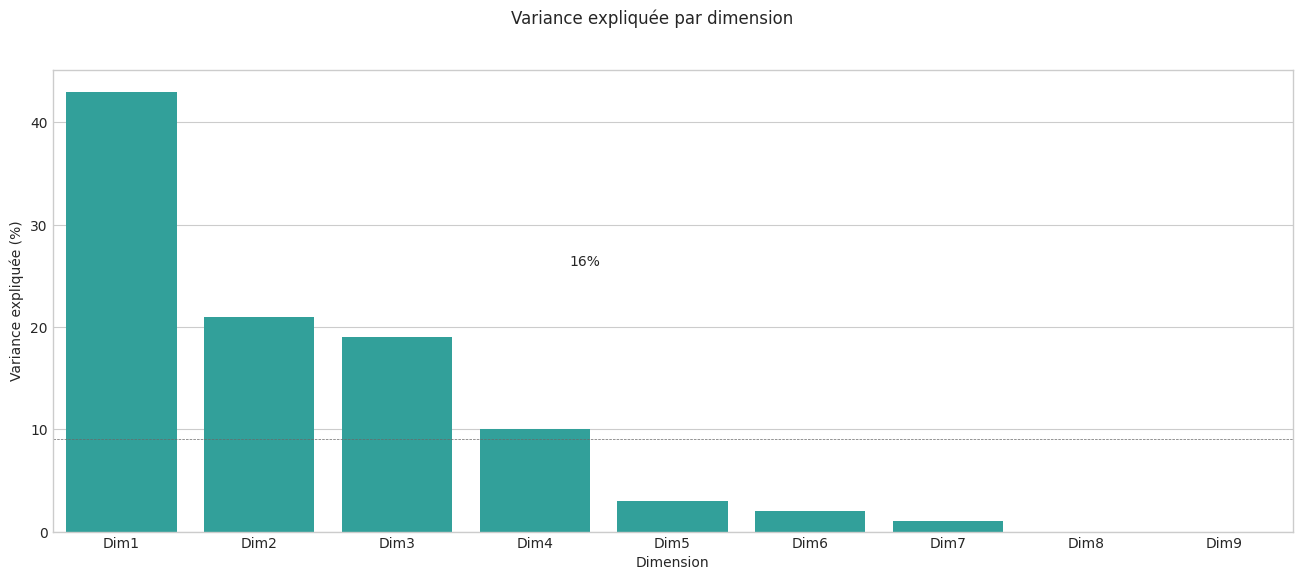

In [218]:
plt.figure(figsize=(16, 6))
g_eig = sns.barplot(x = "Dimension", 
                        y = "% variance expliquée",
                        palette = ["lightseagreen"],
                        data = eig)
plt.text(3.25, 26, "16%")
plt.axhline(y = 9, linewidth = .5, color = "dimgray", linestyle = "--") # 16 = 100 / 6 (nb dimensions)
g_eig.set(ylabel = "Variance expliquée (%)")
g_eig.figure.suptitle("Variance expliquée par dimension")

plt.show()

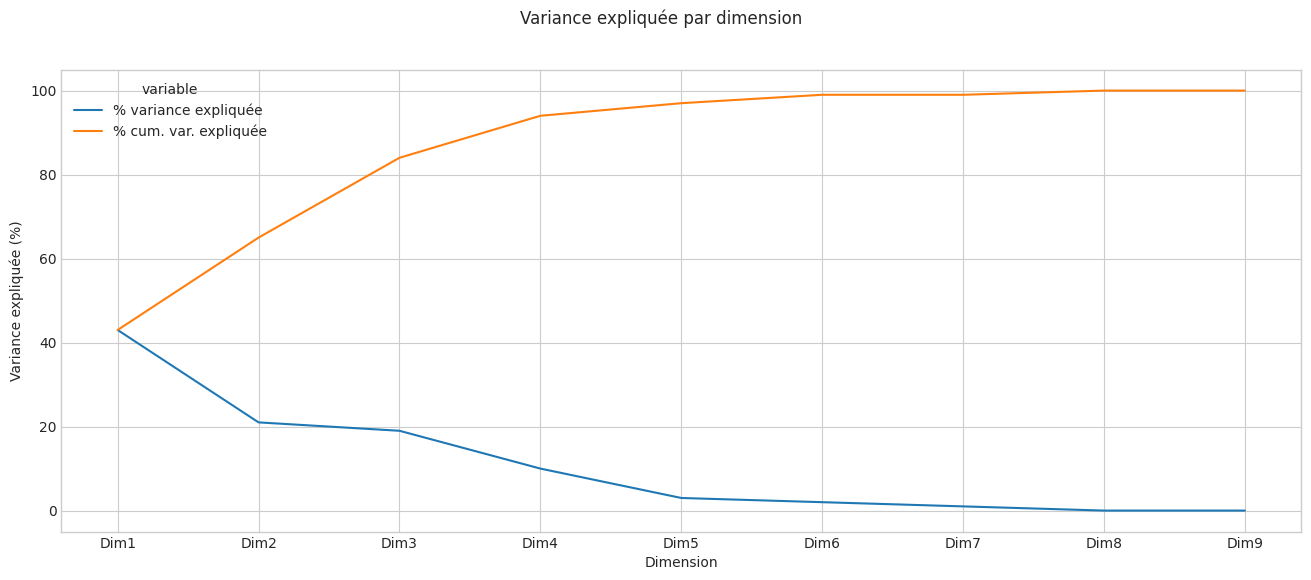

In [219]:
plt.figure(figsize=(16, 6))

eig2 = eig.filter(["Dimension", "% variance expliquée", "% cum. var. expliquée"]).melt(id_vars = "Dimension")
g_eig2 = sns.lineplot(x = "Dimension", 
                 y = "value",
                 hue = "variable",
                 data = eig2)

g_eig2.set(ylabel = "Variance expliquée (%)")
g_eig2.figure.suptitle("Variance expliquée par dimension")

plt.show()

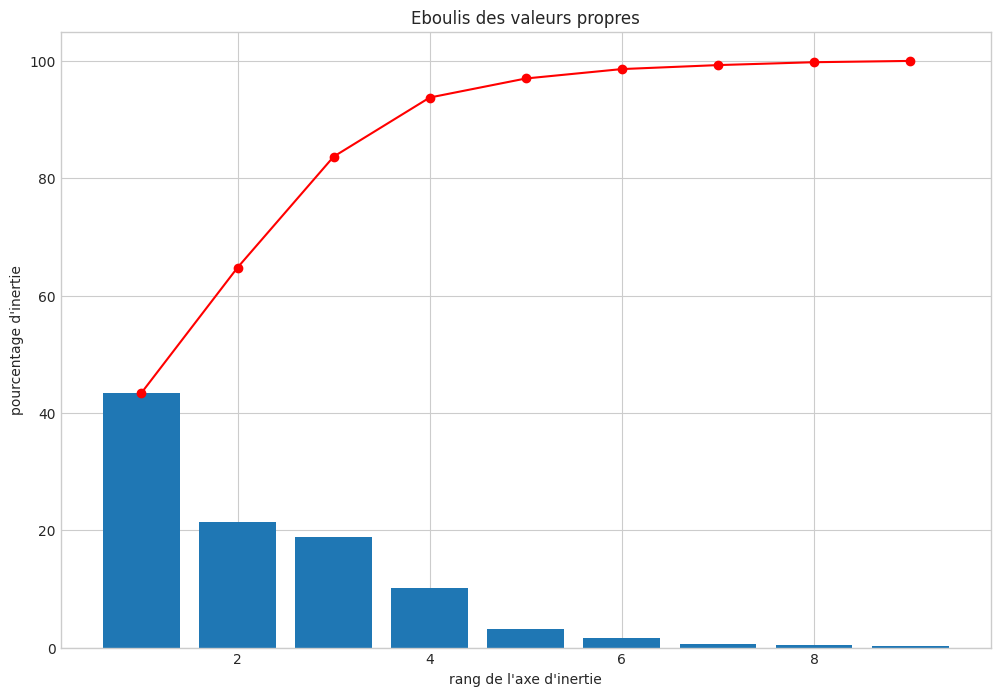

In [220]:
# Eboulis des valeurs propres
varexpl = valprop_ratio*100
fig = plt.figure(figsize=(12,8))
plt.bar(np.arange(len(varexpl))+1, varexpl)
plt.plot(np.arange(len(varexpl))+1, varexpl.cumsum(),c="red",marker='o')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show(block=False)

On remarque ici que les 3 premiers axes cumulent 84% de l'inertie totale.

## Cercle des corrélations

Je vais maintenant calculer les coordonnées des iris de Fisher sur les dimensions, avec la fonction transform() de l'objet pca.

Afin de manipuler plus facilement l'objet obtenu, je vais créer un DataFrame pandas en ne prenant que les trois premières dimensions

In [223]:
iris_pca = acp.transform(acp_dataset[acp_dataset.columns[:14]])
iris_pca_df = pd.DataFrame({
    "Dim1" : iris_pca[:,0], 
    "Dim2" : iris_pca[:,1],
    "Dim3" : iris_pca[:,2]
})
iris_pca_df.head()

,Dim1,Dim2,Dim3
0,0.2011,1.0028,-1.0750
1,-0.0246,-0.6573,1.4068
2,-1.2019,0.8932,-1.0084
3,-1.3386,-0.0903,-0.5220
4,-0.2592,1.1365,0.1485


In [225]:
coordvar = acp.components_.T * numpy.sqrt(valprop)
coordvar_df = pd.DataFrame(coordvar, columns=['PC'+str(i) for i in range(1, 10)], index=acp_dataset.columns[0:10])
coordvar_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
longitude,0.1489,-0.9223,-0.3113,-0.0384,0.0507,-0.0682,0.0792,-0.1235,0.0096
latitude,-0.1462,0.9604,0.1528,-0.0814,0.0386,-0.0470,0.0786,-0.1278,0.0076
housing_median_age,-0.4310,0.0006,0.0709,0.8871,0.1449,-0.0338,0.0045,-0.0073,-0.0003
total_rooms,0.9586,0.0837,0.1110,0.0291,0.0842,-0.1532,0.1462,0.0934,0.0196
total_bedrooms,0.9666,0.0969,-0.0537,0.1172,-0.0772,-0.1304,-0.0768,-0.0370,-0.0970
population,0.9292,0.0613,-0.1025,0.1200,0.1083,0.3047,0.0512,-0.0177,-0.0208
households,0.9713,0.0976,-0.0344,0.1364,-0.0555,-0.0247,-0.1130,-0.0382,0.0972
median_income,0.1103,-0.2318,0.8782,-0.2014,0.3440,-0.0146,-0.0585,-0.0174,-0.0057
median_house_value,0.0868,-0.2548,0.8821,0.1525,-0.3478,0.0471,0.0507,-0.0211,0.0008


##  Cercle de corrélation

Une fois ces coordonnées récupérées, on peut donc afficher ce cercle des corrélations comme ci-dessous.

In [226]:

def correlation_circle(arg1,arg2):
    #cercle des corrélations 
    fig, axes = plt.subplots(figsize=(12,12)) 

    #détermination des limites du graphique
    axes.set_xlim(-1,1) 
    axes.set_ylim(-1,1) 

    #ajouter les axes 
    plt.plot([-1,1],[0,0],linewidth=1, color='grey', ls='--') 
    plt.plot([0,0],[-1,1],linewidth=1, color='grey', ls='--')

    fig.suptitle("Cercle des corrélations (F1 et F2)")

    for j in range(6):
        axes.text(coordvar_df[arg1][j],coordvar_df[arg2][j], coordvar_df.index[j], size = 16)
        axes.plot([0,coordvar_df[arg1][j]], [0,coordvar_df[arg2][j]], color = "gray", linestyle = 'dashed')
    
    #ajouter un cercle 
    cercle = plt.Circle((0,0),1,color='#17aafa',fill=False) 
    axes.add_artist(cercle) 

    # nom des axes, avec le pourcentage d'inertie expliqué
    plt.xlabel('F1 ({}%)'.format(round(100*valprop_ratio[0],2)))
    plt.ylabel('F2 ({}%)'.format(round(100*valprop_ratio[1],2)))

    return plt.show()


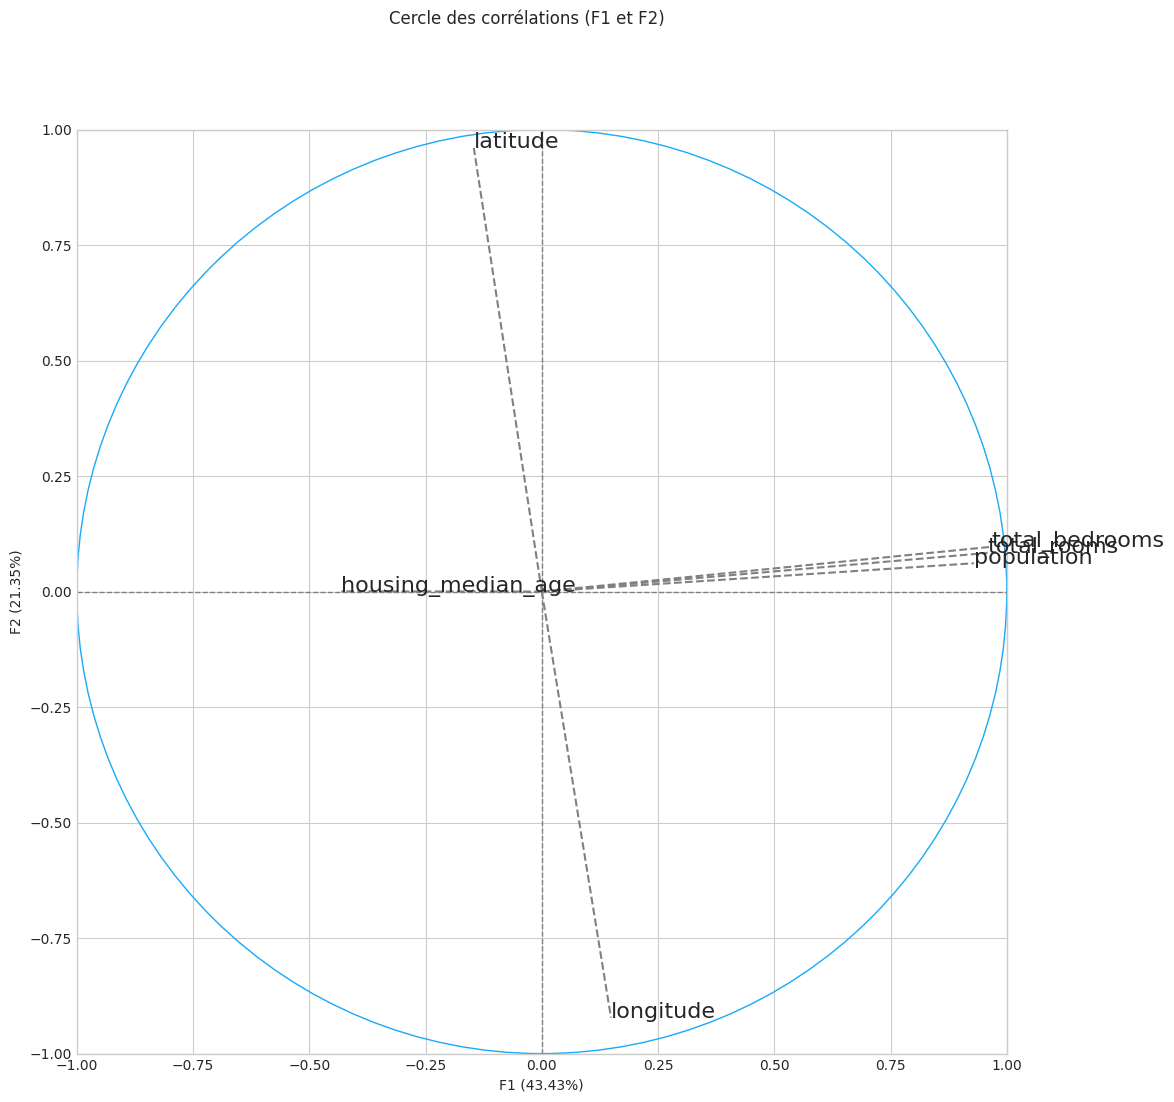

In [227]:
correlation_circle("PC1","PC2")

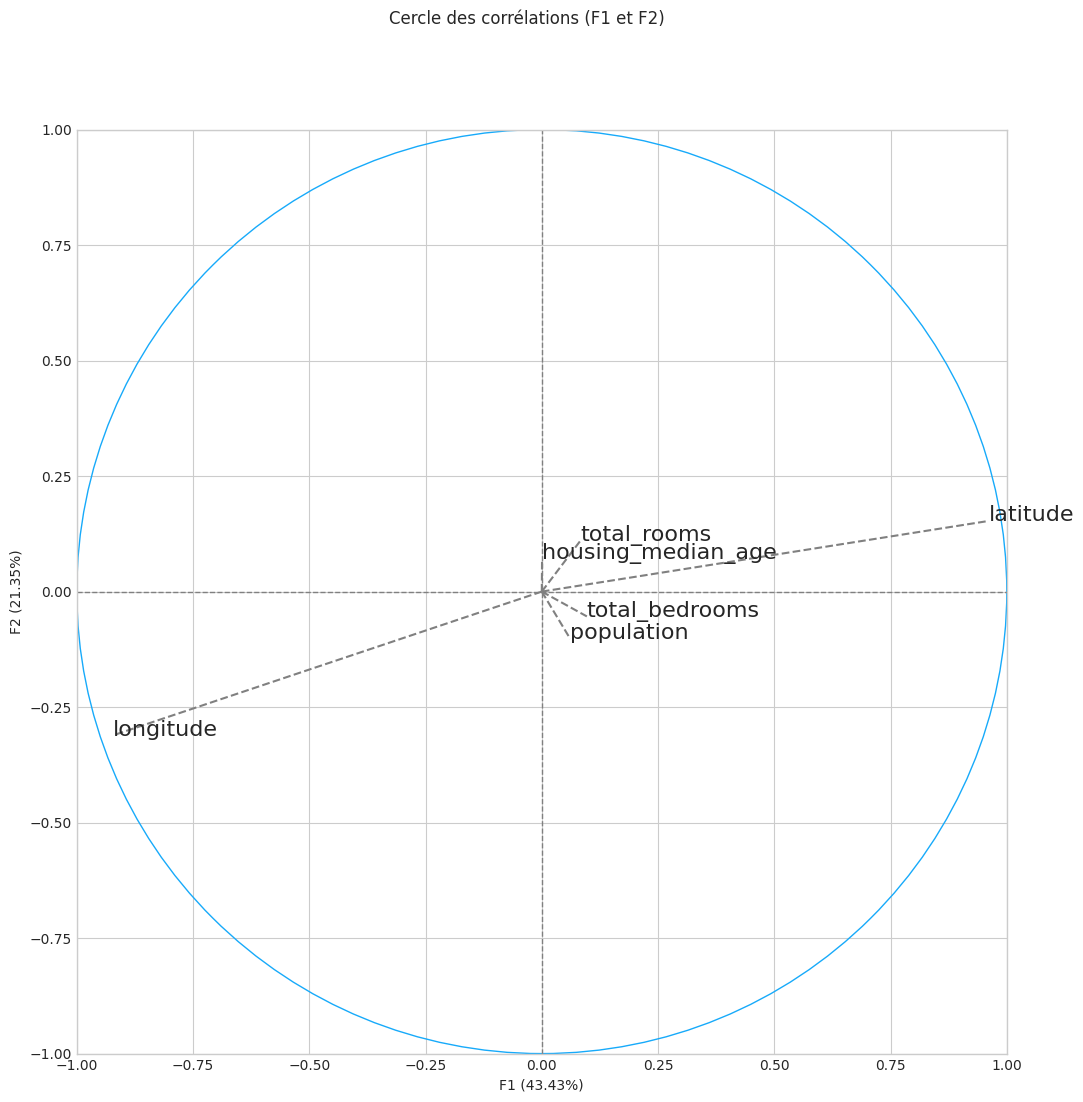

In [229]:
correlation_circle("PC2","PC3")

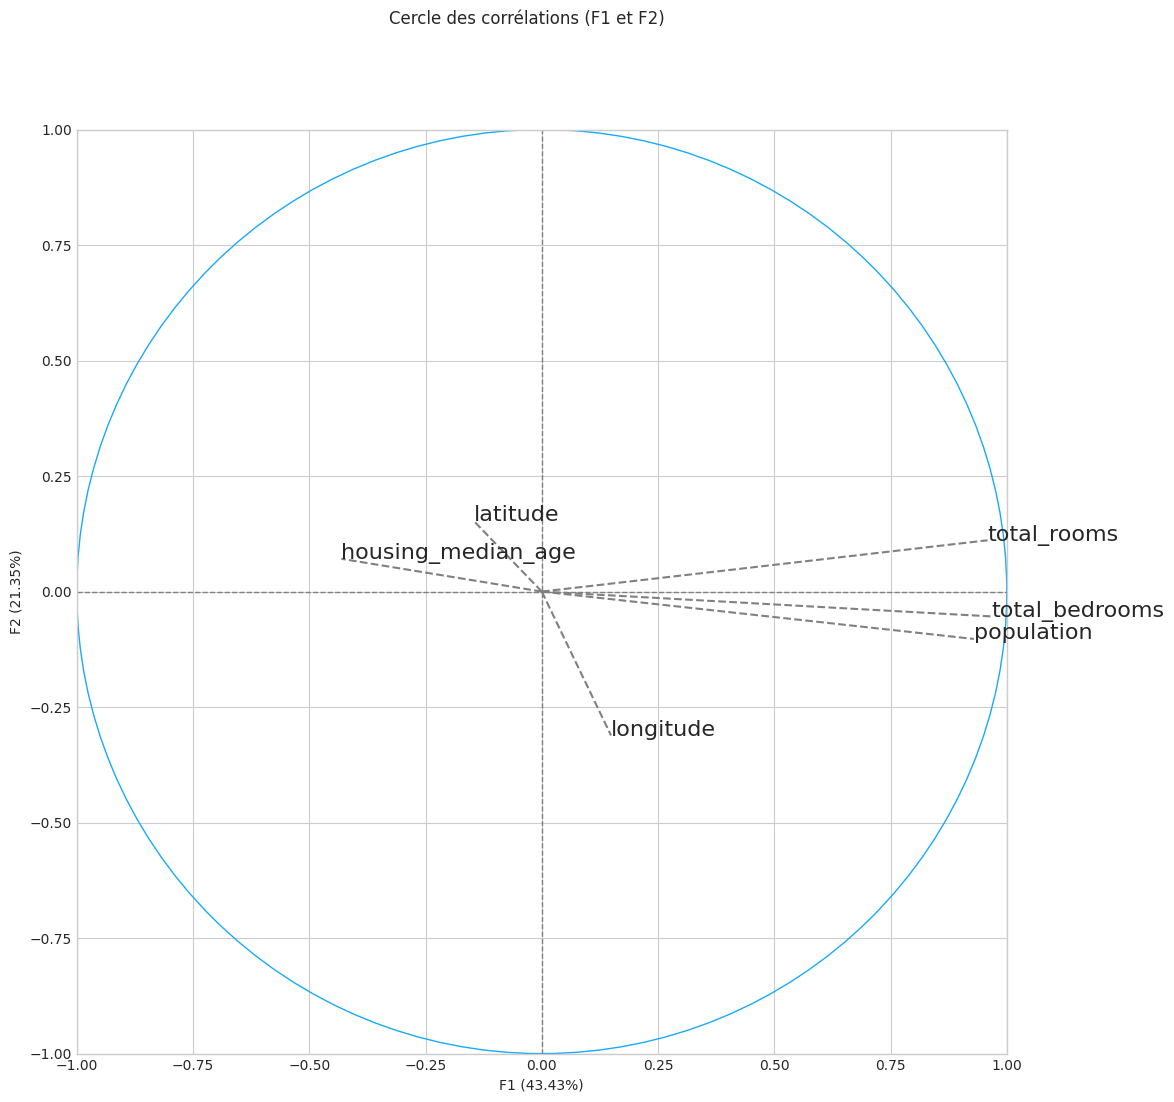

In [228]:
correlation_circle("PC1","PC3")

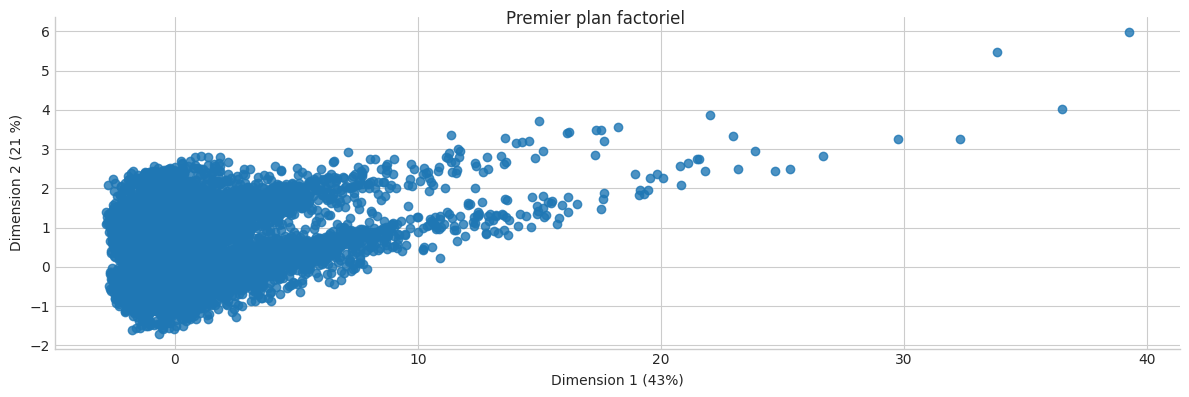

In [231]:
g_pca = sns.lmplot(x = "Dim1", y = "Dim2", data = iris_pca_df, fit_reg = False, 
                       height = 4, aspect = 3)
g_pca.set(xlabel = "Dimension 1 (43%)", ylabel = "Dimension 2 (21 %)")
g_pca.fig.suptitle("Premier plan factoriel")

plt.show()